In [1]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px     ### potting data on world map
import matplotlib.pyplot as plt

# pip install cython
# pip install pystan
# pip install fbprohet

In [3]:
df = pd.read_csv(path)
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25676 entries, 0 to 25675
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  7840 non-null   object 
 1   Country/Region  25676 non-null  object 
 2   Lat             25676 non-null  float64
 3   Long            25676 non-null  float64
 4   Date            25676 non-null  object 
 5   Confirmed       25676 non-null  int64  
 6   Deaths          25676 non-null  int64  
 7   Recovered       25676 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.3+ MB


In [5]:
df.drop(['Province/State'],axis=1,inplace = True)
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,Albania,41.1533,20.1683,1/22/20,0,0,0
2,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [6]:
df = df.rename(columns={"Country/Region" : 'country'})

In [7]:
df.head()

,country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,Albania,41.1533,20.1683,1/22/20,0,0,0
2,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [8]:
active = df['Confirmed'] - df['Recovered'] - df['Deaths']
active.tail()

25671     1
25672    34
25673     1
25674     4
25675     1
dtype: int64

In [9]:
# concatenate alternative
df['Active'] = active
df.tail()

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
25671,France,46.885200,-56.315900,4/28/20,1,0,0,1
25672,South Sudan,6.877000,31.307000,4/28/20,34,0,0,34
25673,Western Sahara,24.215500,-12.885800,4/28/20,6,0,5,1
25674,Sao Tome and Principe,0.186360,6.613081,4/28/20,8,0,4,4
25675,Yemen,15.552727,48.516388,4/28/20,1,0,0,1


In [10]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25676 entries, 0 to 25675
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    25676 non-null  object 
 1   Lat        25676 non-null  float64
 2   Long       25676 non-null  float64
 3   Date       25676 non-null  object 
 4   Confirmed  25676 non-null  int64  
 5   Deaths     25676 non-null  int64  
 6   Recovered  25676 non-null  int64  
 7   Active     25676 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.4+ MB


In [11]:
### Converting the Data Time object to datetime64[ns] format
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25676 entries, 0 to 25675
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    25676 non-null  object        
 1   Lat        25676 non-null  float64       
 2   Long       25676 non-null  float64       
 3   Date       25676 non-null  datetime64[ns]
 4   Confirmed  25676 non-null  int64         
 5   Deaths     25676 non-null  int64         
 6   Recovered  25676 non-null  int64         
 7   Active     25676 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.5+ MB


In [12]:
# Filter the data on the basis of the latest date
# top = df[df['Date'] == '2020-04-28']
top = df[df['Date'] == df['Date'].max()]
top.head()

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
25414,Afghanistan,33.0000,65.0000,2020-04-28,1828,58,228,1542
25415,Albania,41.1533,20.1683,2020-04-28,750,30,431,289
25416,Algeria,28.0339,1.6596,2020-04-28,3649,437,1651,1561
25417,Andorra,42.5063,1.5218,2020-04-28,743,41,398,304
25418,Angola,-11.2027,17.8739,2020-04-28,27,2,6,19


In [13]:
# Group on basis of the country(for all the dates) and display the cumulative 'Confirmed','Active','Recovered','Deaths'
# Resetting index since the country indented to show the group by "Basis"
# Also make country again as index since it's lost after grouping
# In case of accidental duplicates,groupby eliminates those
world = top.groupby('country')['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

,country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,1828,1542,228,58
1,Albania,750,289,431,30
2,Algeria,3649,1561,1651,437
3,Andorra,743,304,398,41
4,Angola,27,19,6,2


In [14]:
### Plot on the World Map((Active Cases))
figure = px.choropleth(world,locations='country',locationmode='country names',color='Active',
                       color_continuous_scale='Peach', range_color=[1,1000],
                       title = "Countries with Active Cases",hover_name = 'country')
figure.show()

In [15]:
### Plot on the World Map((Active Cases))
figure = px.choropleth(world,locations='country',locationmode='country names',color='Deaths',
                       color_continuous_scale='darkmint', range_color=[1,10000],
                       title = "Countries with Deaths",hover_name = 'country')
figure.show()

In [16]:
#### Plot WorldWide Confirmed Cases vs Date
## Add all the confimred cases based on date
total_confirmed_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_death_cases = df.groupby('Date')['Date','Deaths'].sum().reset_index()
total_confirmed_cases.tail()

,Date,Confirmed
93,2020-04-24,2811598
94,2020-04-25,2897619
95,2020-04-26,2972358
96,2020-04-27,3041759
97,2020-04-28,3116393


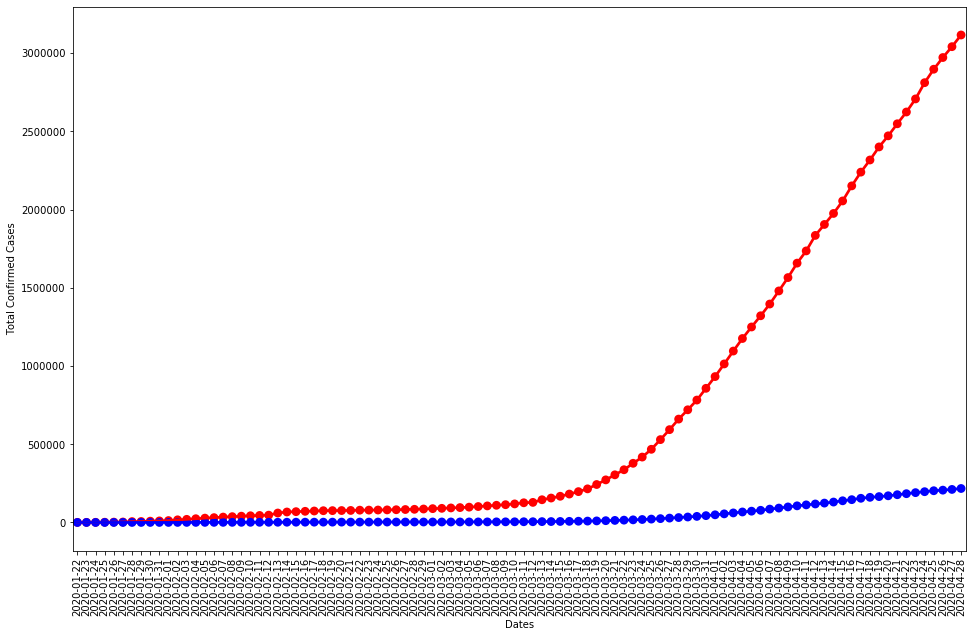

In [17]:
# Dates are overlapping and points are not clear so will have to modifying the plotting paramters
# pixel Dimensions
plt.figure(figsize=(16,10)) 

# rotate date/time by 90*, set fontsize = 10
plt.xticks(rotation = 90,fontsize = 10 ) 

# Extract only the date from date-time
sns.pointplot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed'],color='red')
sns.pointplot(total_confirmed_cases['Date'].dt.date,total_death_cases['Deaths'],color='blue')

# Plotting the axes titles
plt.xlabel("Dates")
plt.ylabel("Total Confirmed Cases")

plt.show()

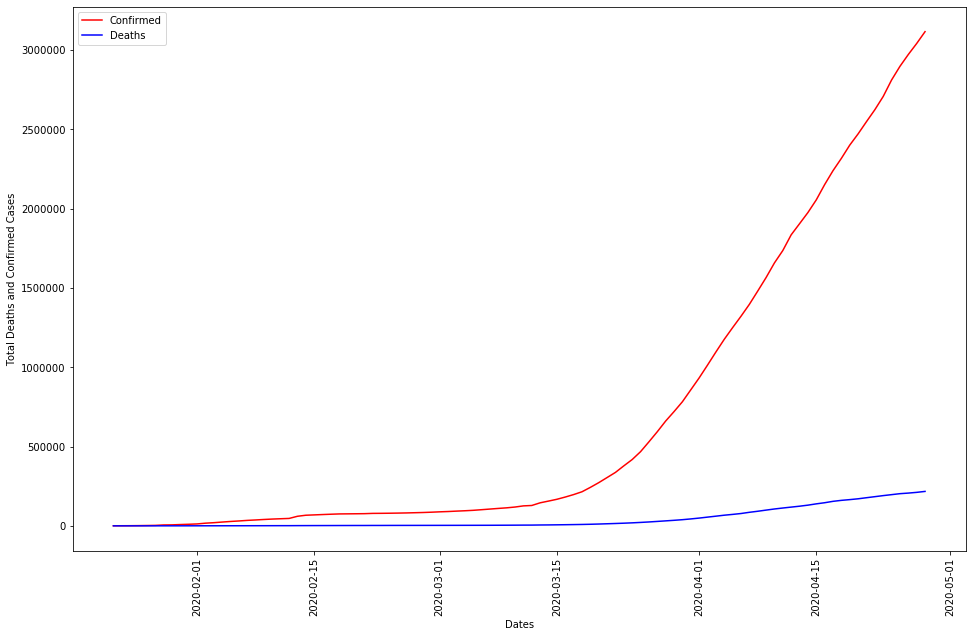

In [18]:
# Dates are overlapping and points are not clear so will have to modifying the plotting paramters
# pixel Dimensions
plt.figure(figsize=(16,10)) 

# rotate date/time by 90*, set fontsize = 10
plt.xticks(rotation = 90,fontsize = 10 ) 

# Extract only the date from date-time
# sns.pointplot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed'],color='red')
# sns.pointplot(total_confirmed_cases['Date'].dt.date,total_death_cases['Deaths'],color='blue')
plt.plot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed'],color='red',label='Confirmed')
plt.plot(total_death_cases['Date'].dt.date,total_death_cases['Deaths'],color='blue',label='Deaths')

# Plotting the axes titles
plt.xlabel("Dates")
plt.ylabel("Total Deaths and Confirmed Cases")
plt.legend(loc=2)
plt.show()

In [19]:
### Top 20 Countries having the most number of the Confirmed Cases
### Grouping based on country and sorting based on cumulative descending Confirmed cases
top_confirmed = top.groupby('country')['Confirmed'].sum().sort_values(ascending=False).reset_index()
top_confirmed.head()

,country,Confirmed
0,US,1012582
1,Spain,232128
2,Italy,201505
3,France,169053
4,United Kingdom,162350


In [20]:
top_20 = top_confirmed.head(20)
print(top_20)

country  Confirmed
0               US    1012582
1            Spain     232128
2            Italy     201505
3           France     169053
4   United Kingdom     162350
5          Germany     159912
6           Turkey     114653
7           Russia      93558
8             Iran      92584
9            China      83940
10          Brazil      73235
11          Canada      51150
12         Belgium      47334
13     Netherlands      38607
14           India      31324
15            Peru      31190
16     Switzerland      29264
17        Portugal      24322
18         Ecuador      24258
19    Saudi Arabia      20077


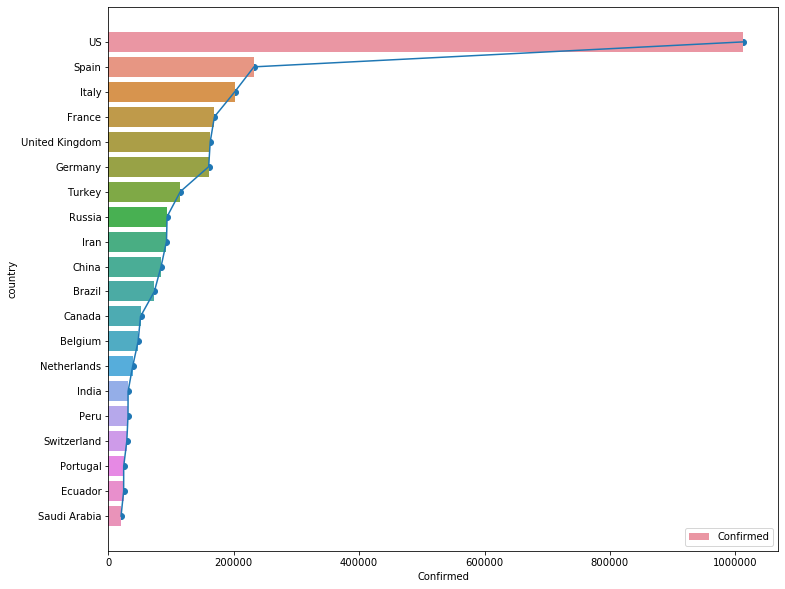

In [21]:
### PLotting the data in the form of Bar Graph
plt.figure(figsize=(12,10))
sns.barplot(top_20['Confirmed'],top_20['country'],label='Confirmed') # barplot
plt.plot(top_20['Confirmed'],top_20['country'])  #lineplot
plt.scatter(top_20['Confirmed'],top_20['country']) #scatterplot
plt.legend(loc=4)  # loc = 4 (means 4th Quadrant)
plt.show()

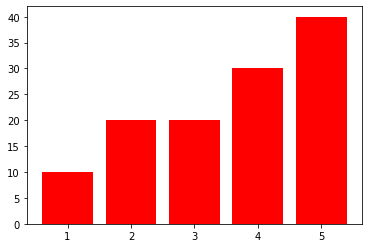

In [22]:
#### 

x= [1,2,3,4,5]
y=[10,20,20,30,40]
plt.bar(x,y,color = 'red')
plt.show()

In [23]:
#### Make the data frames for some countries
## China 
china = df[df['country'] == 'China']
china = china.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
china.head()

,Date,Active,Confirmed,Recovered,Deaths
0,2020-01-22,503,548,28,17
1,2020-01-23,595,643,30,18
2,2020-01-24,859,920,35,26
3,2020-01-25,1326,1406,38,42
4,2020-01-26,1971,2075,48,56


In [24]:
# Italy
italy = df[df['country'] == 'Italy']
italy = italy.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
italy.head()

,Date,Active,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [25]:
# India
india = df[df['country'] == 'India']
india = india.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
india.head()

,Date,Active,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [26]:
# US
us = df[df['country'] == 'US']
us = us.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
us.head()

,Date,Active,Confirmed,Recovered,Deaths
0,2020-01-22,1,1,0,0
1,2020-01-23,1,1,0,0
2,2020-01-24,2,2,0,0
3,2020-01-25,2,2,0,0
4,2020-01-26,5,5,0,0


In [27]:
# Germany
germany = df[df['country'] == 'Germany']
germany = germany.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
germany.head()

,Date,Active,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


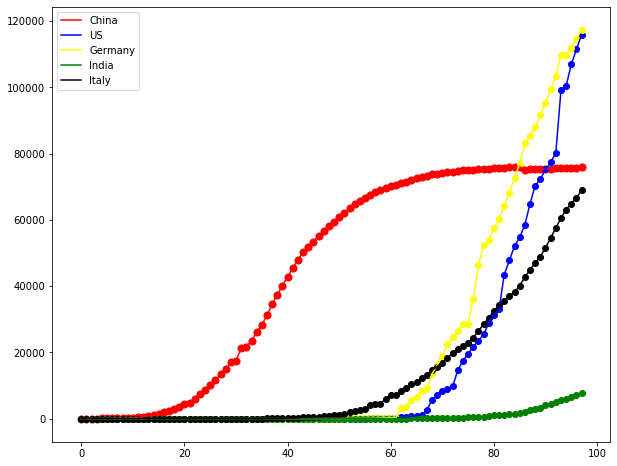

In [28]:
# Taking the serial no on the X-axis
# Plotting all the line plots
plt.figure(figsize=(10,8))
plt.plot(china.index,china['Recovered'],color = 'red',label='China')
plt.plot(us.index,us['Recovered'],color = 'blue',label='US')
plt.plot(germany.index,germany['Recovered'],color = 'yellow',label='Germany')
plt.plot(india.index,india['Recovered'],color = 'green',label='India')
plt.plot(italy.index,italy['Recovered'],color = 'black',label='Italy')

# Plotting all the scatter plots
# Changing the marker style and size
# Remove labels so they don't appear again
plt.scatter(china.index,china['Recovered'],color = 'red',marker = "." , s = 200)
plt.scatter(us.index,us['Recovered'],color = 'blue')
plt.scatter(germany.index,germany['Recovered'],color = 'yellow')
plt.scatter(india.index,india['Recovered'],color = 'green')
plt.scatter(italy.index,italy['Recovered'],color = 'black')

plt.legend(loc = 2)
plt.show()

# Forecasting of Time Series 

In [29]:
### Using library Fbprophet - Time Series Analysis(Forecasting) - Created by Facebook
### Using ARIMA (ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.)

### Forcasting for confirmed cases

In [30]:
# Fbprophet is the complete library
# Prophet is the name of class
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [31]:
# Checking the date-time format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25676 entries, 0 to 25675
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    25676 non-null  object        
 1   Lat        25676 non-null  float64       
 2   Long       25676 non-null  float64       
 3   Date       25676 non-null  datetime64[ns]
 4   Confirmed  25676 non-null  int64         
 5   Deaths     25676 non-null  int64         
 6   Recovered  25676 non-null  int64         
 7   Active     25676 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.5+ MB


In [32]:
df.head()

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [33]:
# Grouping by the date column
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [34]:
### According to the Fbprophet - Date Column name should be 'ds' and the data name should be 'y'
confirmed = confirmed.rename(columns={"Date" : "ds" , "Confirmed" : "y"})
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [35]:
#### Building the model
## model will try its best to give 95 % accurate result (confidence interval in statistics)
## 5 % error is allowed
model = Prophet(interval_width=0.95)

NameError: name 'Prophet' is not defined

In [36]:
### Train the model
## In forecasting (unlike eg Linear Regreesion) , we pass entire data
model.fit(confirmed)
# Ignore the warning

NameError: name 'model' is not defined

In [37]:
# We are forecasting for the next 7 days
future_dates = model.make_future_dataframe(periods=7)
future_dates.tail(7)

NameError: name 'model' is not defined

In [38]:
# Predicting based on the trained model
forecast = model.predict(future_dates)
print(forecast)

NameError: name 'model' is not defined

In [39]:
# Giving the range of values for forecast for the next few days
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

NameError: name 'forecast' is not defined

In [40]:
### Plot the data
## Dots = Actual value, Blue line = forcasted Value  
confirmed_plot = model.plot(forecast)

NameError: name 'model' is not defined

In [41]:
### Plot Weekly Data
## People are going out on the weekends,that's why the weekends have higher rates
confirmed_plot_weekly = model.plot_components(forecast)

NameError: name 'model' is not defined

# For India

In [42]:
from fbprophet import Prophet

df_india = df[df['country']=='India']
df_india.head()


# Grouping by the date column
confirmed = df_india.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

### According to the Fbprophet - Date Column name should be 'ds' and the data name should be 'y'
confirmed = confirmed.rename(columns={"Date" : "ds" , "Confirmed" : "y"})
confirmed.head()

#### Building the model
## model will try its best to give 95 % accurate result (confidence interval in statistics)
## 5 % error is allowed
model = Prophet(interval_width=0.95)

### Train the model
## In forecasting (unlike eg Linear Regreesion) , we pass entire data
model.fit(confirmed)
# Ignore the warning

# We are forecasting for the next 7 days
future_dates = model.make_future_dataframe(periods=7)
future_dates.tail(7)

# Predicting based on the trained model
forecast = model.predict(future_dates)
print(forecast)

# Giving the range of values for forecast for the next few days
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

### Plot the data
## Dots = Actual value, Blue line = forcasted Value  
confirmed_plot = model.plot(forecast)

print()

### Plot Weekly Data
## People are going out on the weekends,that's why the weekends have higher rates
confirmed_plot_weekly = model.plot_components(forecast)

ModuleNotFoundError: No module named 'fbprophet'

In [43]:
# More information on
# https://facebook.github.io/prophet/docs/diagnostics.html
